<a href="https://colab.research.google.com/github/kvnchandra/ml-assignment-bangkit/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Breast Cancer Diagnostic**


---


*Bangkit Academy 2020 : DPS-1 #05-W05-First Machine Learning Project - MLCC*

Team members :
1.   Kevin Chandra
2.   Oktavia Citra
3.   Gani Nur Fadli

We use data from [kaggle.com ](https://https://www.kaggle.com/) with the title "Breast Cancer Wisconsin (Diagnostic) Data Set". We want to predict whether the cancer is benign or malignant of breast cancer patients. We can build this program because we've learned a lot from [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course) and [TensorFlow Website](https://www.tensorflow.org/tutorials/)

***Here the step by step and code bellow!***


# **Setup**

identification tensorflow newest version, so there is no error with the caption "tensorflow is already loaded. please restart the runtime to change versions."

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import all modules and library that you need in the top

In [0]:
# Import relevant modules
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

# **Initial Data**

If you have data.csv and you want to publish on web, you can use feature Google Spreadsheet. You just need to copy the link that had been generated

In [16]:
# Download data using URL then save as "data.csv"
URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQwPxotnLsgXuZt6tIXlAANttT3pxhP4ph0FhSjwvGUXfGKcnFRiqJORQg_9lBC77AH7QaxYypQ24nX/pub?output=csv"
dataset_path = keras.utils.get_file("data.csv", URL)
dataset_path

'/root/.keras/datasets/data.csv'

This is using funcation read data csv from pandas. It's so simple

In [17]:
# Read data that had been dowloaded
dataframe = pd.read_csv(dataset_path)
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


Get all the columns in dataset

In [18]:
dataframe.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

There are some columns that have space in their name. So we rename that columns' name so there is no space in the name

In [0]:
dataframe.rename(columns={'concave points_mean': 'concave_points_mean',
                          'concave points_se' : 'concave_points_se',
                          'concave points_worst' : 'concave_points_worst'},
                 inplace=True)

Based on the table above, **id** won't be used as feature for classification problem. So we remove the **id**

In [20]:
dataframe.drop('id', axis=1, inplace=True)  # dropping the 'id' column

print("Row, Col", dataframe.shape)          # (row,col)

Row, Col (569, 31)


For diagnosis, we change the label as 1 and 0 :
- Benign : 0
- Malignant : 1

In [21]:
dataframe['diagnosis'] = dataframe['diagnosis'].map({'M':1, 'B':0})

dataframe.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,1,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,1,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,1,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,1,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In classification, you must have 3 types of data. Those are train data, validation data, and test data.

In [22]:
# Separate data into 3 types
train, test = train_test_split(dataframe, 
                               test_size=0.2,
                               stratify=dataframe['diagnosis'])     # split data into same ratio based on diagnosis

print('Length of\n\tTrain Data\t: ', len(train),
      '\n\tTest Data\t: ', len(test))

Length of
	Train Data	:  455 
	Test Data	:  114


# **Inspect Data**

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 297 to 33
Data columns (total 31 columns):
diagnosis                  455 non-null int64
radius_mean                455 non-null float64
texture_mean               455 non-null float64
perimeter_mean             455 non-null float64
area_mean                  455 non-null float64
smoothness_mean            455 non-null float64
compactness_mean           455 non-null float64
concavity_mean             455 non-null float64
concave_points_mean        455 non-null float64
symmetry_mean              455 non-null float64
fractal_dimension_mean     455 non-null float64
radius_se                  455 non-null float64
texture_se                 455 non-null float64
perimeter_se               455 non-null float64
area_se                    455 non-null float64
smoothness_se              455 non-null float64
compactness_se             455 non-null float64
concavity_se               455 non-null float64
concave_points_se          455 n

In [24]:
train.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.373626,14.183316,19.321165,92.311275,661.470549,54.158886,30.322453,40.241774,39.000257,17.674321,66.405338,30.767624,23.884607,7.098154,41.103132,47.551393,28.458642,32.550218,38.773143,21.027747,30.247582,16.329642,25.759736,107.596396,887.906154,13.971422,31.224459,32.827037,51.855993,35.135708,57.346374
std,0.484299,3.581356,4.243650,24.659941,357.238957,194.449981,118.898680,144.577454,129.492601,51.845944,186.093379,101.037846,124.765016,60.880744,47.362432,160.381867,105.360480,118.631144,140.676212,61.270144,102.872969,4.879352,6.008747,33.929979,570.088612,58.377163,108.818931,113.997723,169.227823,93.528502,193.453560
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.110000,0.060000,0.000000,0.000000,0.180000,0.060000,0.210000,0.780000,1.011000,7.228000,0.010000,1.003000,0.000000,0.000000,1.013000,1.008000,7.930000,12.020000,50.410000,185.200000,0.130000,0.100000,0.000000,0.000000,0.240000,0.120000
25%,0.000000,11.710000,16.400000,75.100000,420.650000,1.152000,1.450500,1.751500,1.988500,1.619000,5.794500,2.252000,1.319000,1.692500,17.670000,4.567000,1.738500,1.842000,1.364500,1.541000,2.241000,13.050000,21.395000,84.440000,516.150000,1.218500,1.841000,1.888000,1.589000,2.520000,6.640000
50%,0.000000,13.340000,18.820000,86.100000,546.400000,8.363000,4.726000,3.201000,3.716000,1.811000,6.222000,3.242000,1.905000,2.355000,24.720000,6.001000,2.839000,3.125000,2.536000,1.958000,3.338000,14.910000,25.450000,97.190000,680.600000,1.368000,2.772000,3.344000,2.796000,2.889000,7.632000
75%,1.000000,16.150000,21.810000,106.750000,808.500000,9.381000,7.696000,6.265000,7.741500,2.017000,6.878000,5.378000,7.174500,3.624500,45.460000,7.802500,5.312000,5.378000,7.960500,2.706000,4.785500,19.425000,29.765000,128.350000,1159.000000,1.562500,4.837500,5.781000,7.956500,3.320500,8.576500
max,1.000000,28.110000,39.280000,188.500000,2501.000000,995.000000,958.000000,973.000000,974.000000,235.000000,898.000000,726.000000,967.000000,968.000000,542.200000,968.000000,911.000000,996.000000,952.000000,388.000000,761.000000,36.040000,49.540000,251.200000,4254.000000,997.000000,937.000000,846.000000,991.000000,544.000000,997.000000


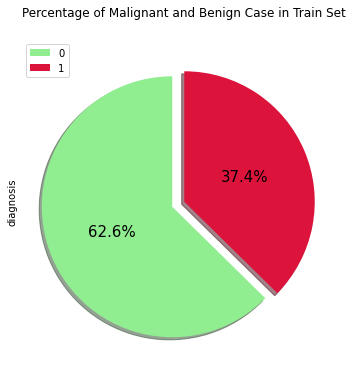

In [25]:
colors_list = ['lightgreen', 'crimson']
explode_list = [0.1, 0]     # ratio for each class with which to offset each wedge.

train['diagnosis'].value_counts().plot(kind='pie',
                                       figsize=(6, 6),
                                       autopct='%1.1f%%', 
                                       startangle=90,    
                                       shadow=True,       
                                       labels=None,         # turn off labels on pie chart
                                       pctdistance=0.5,     # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                       fontsize=15,
                                       colors=colors_list,  # add custom colors
                                       explode=explode_list 
                                       )

# scale the title up by 5% to match pctdistance
plt.title('Percentage of Malignant and Benign Case in Train Set', y = 1.05) 

# add legend
plt.legend(labels=train['diagnosis'].value_counts().index, loc='upper left') 

plt.show()

Choose one criteria column from the data

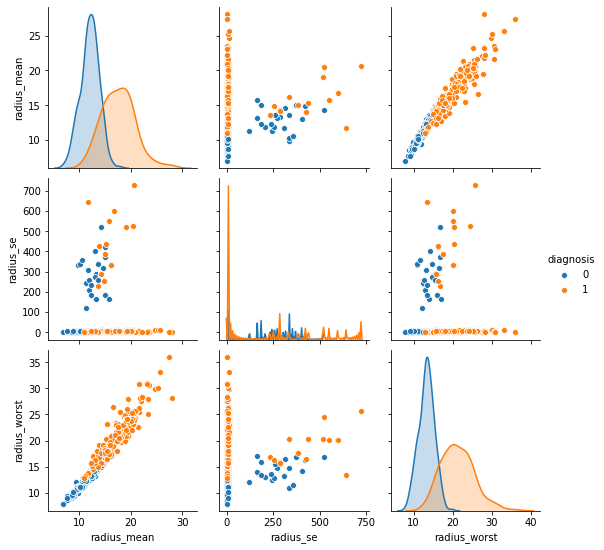

In [26]:
# Create plot to display data
sns.pairplot(train[["diagnosis", "radius_mean",	"radius_se", "radius_worst"]],
             hue = 'diagnosis', 
             diag_kind="kde")

Split train data to train set and val set

In [27]:
train, val = train_test_split(train, 
                              test_size=0.2, 
                              stratify=train['diagnosis'])

print('Length of\n\tTrain Data\t: ', len(train),
      '\n\tTest Data\t: ', len(val))

Length of
	Train Data	:  364 
	Test Data	:  91
